### Đưa dữ liệu ***training*** vào bộ nhớ

In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
#Load dữ liệu
reviews_train = load_files("aclImdb_v2/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target


### Đọc dữ liệu và nhãn đầu tiên trong bộ dữ liệu training

In [2]:
check = ['negative','positive']
print(text_train[0])
print(check[y_train[0]])

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."
positive


### Tiền xử lý dữ liệu (Data pre-processing)

In [3]:
text_train = [doc.decode('utf-8') for doc in text_train]

### Làm sách xóa các (tag < br />).  trong dữ liệu

In [ ]:
import re
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)


text_train = [clean(doc) for doc in text_train]
text_train[0]

### Xóa các ký hiệu đặc biệt trong dữ liệu

In [5]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

text_train = [is_special(doc) for doc in text_train]
text_train[0]

'Zero Day leads you to think  even re think why two boys young men would do what they did   commit mutual suicide via slaughtering their classmates  It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction It is not a perfect movie but given what money time the filmmaker and actors had   it is a remarkable product  In terms of explaining the motives and actions of the two young suicide murderers it is better than  Elephant    in terms of being a film that gets under our  rationalistic  skin it is a far  far better film than almost anything you are likely to see  Flawed but honest with a terrible honesty '

### lowercase toán bộ dữ liệu

In [6]:
def to_lower(text):
    return text.lower()

text_train = [to_lower(doc) for doc in text_train]
text_train[0]

'zero day leads you to think  even re think why two boys young men would do what they did   commit mutual suicide via slaughtering their classmates  it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction it is not a perfect movie but given what money time the filmmaker and actors had   it is a remarkable product  in terms of explaining the motives and actions of the two young suicide murderers it is better than  elephant    in terms of being a film that gets under our  rationalistic  skin it is a far  far better film than almost anything you are likely to see  flawed but honest with a terrible honesty '

In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['i', 'me', 'thick', 'most', 'anything', 'while', 'whoever', 'side', 'through', 'forty', 'name', 'bottom', 'thereby', 'anyone', 'next', 'empty', 'itself', 'he', 'and', 'via', 'hers', 'now', 'the', 'is', 'behind', 'once', 'formerly', 'latterly', 'without', 'get', 'a', 'fire']


### Đưa dữ liệu ***test*** vào bộ nhớ và tiền xử lý dữ liệu

In [8]:
reviews_test = load_files("aclImdb_v2/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

text_test = [doc.decode('utf-8') for doc in text_test]
text_test = [clean(doc) for doc in text_test]
text_test = [is_special(doc) for doc in text_test]
text_test = [to_lower(doc) for doc in text_test]

In [9]:
text_test[0]


'don t hate heather graham because she s beautiful  hate her because she s fun to watch in this movie  like the hip clothing and funky surroundings  the actors in this flick work well together  casey affleck is hysterical and heather graham literally lights up the screen  the minor characters   goran visnjic  sigh  and patricia velazquez are as talented as they are gorgeous  congratulations miramax   director lisa krueger '

### Ví dụ Áp dụng túi từ (Bag-of-Words) để trích xuất đặc trưng

In [10]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26960 sparse matrix of type '<class 'numpy.int64'>'
	with 2149105 stored elements in Compressed Sparse Row format>


In [11]:
X_test = vect.transform(text_test)
print("X_train with stop words:\n{}".format(repr(X_test)))

X_train with stop words:
<25000x26960 sparse matrix of type '<class 'numpy.int64'>'
	with 2076861 stored elements in Compressed Sparse Row format>


## Huần luyện dữ liệu với Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\Admin\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
model_accuracy = 100*accuracy_score(y_test, y_pred)
print ("Accuracy: %.2f %%" %(model_accuracy))

Accuracy: 85.54 %


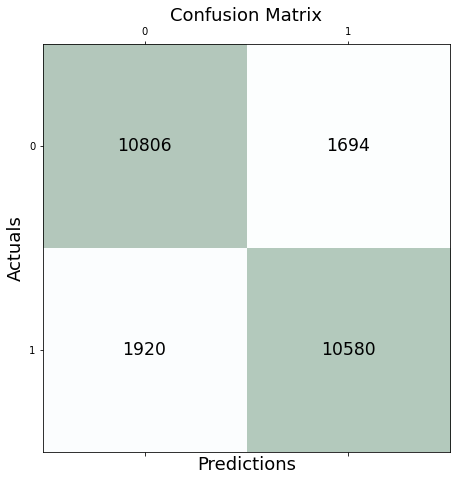

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.BuGn, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))


0.8619846830699038
0.8464


In [16]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred))

0.8554281853599927
0.85544
0.8554281853599927
0.854121256155647


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



## Huần luyện dữ liệu với SGDClassifier

In [18]:
from sklearn.linear_model import SGDClassifier


model_1 = SGDClassifier()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [19]:
model_1_accuracy = 100*accuracy_score(y_test, y_pred_1)
print ("Accuracy: %.2f %%" %(model_1_accuracy))


Accuracy: 84.00 %


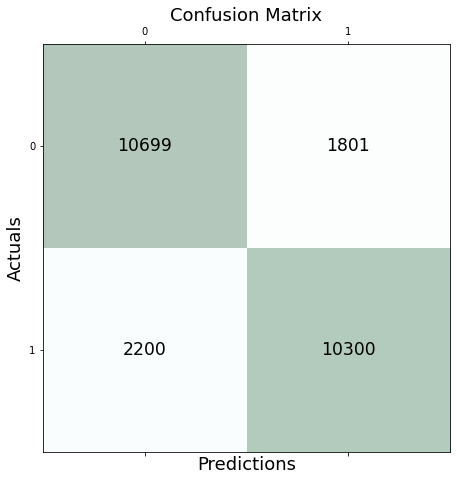

In [20]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_1)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.BuGn, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_pred_1))
print(recall_score(y_train, y_pred_1))


0.8511693248491861
0.824


In [22]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_1, average='macro'))
print(f1_score(y_test, y_pred_1, average='micro'))
print(f1_score(y_test, y_pred_1, average='weighted'))
print(f1_score(y_test, y_pred_1))

0.8399192239686
0.83996
0.8399192239686
0.8373643347831389


In [23]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



## Huần luyện dữ liệu với DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

In [25]:
model_2_accuracy = 100*accuracy_score(y_test, y_pred_2)
print ("Accuracy: %.2f %%" %(model_2_accuracy))


Accuracy: 72.58 %


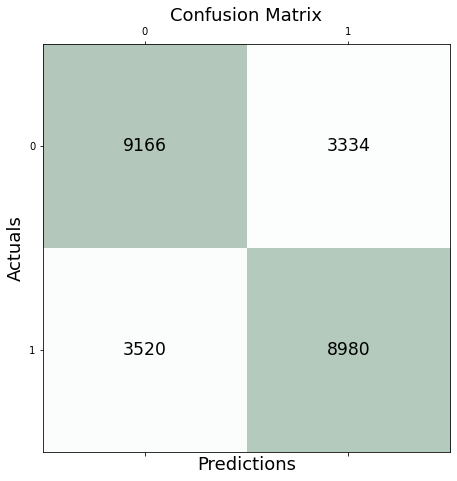

In [26]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.BuGn, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_pred_2))
print(recall_score(y_train, y_pred_2))

0.7292512587299009
0.7184


In [28]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_2, average='macro'))
print(f1_score(y_test, y_pred_2, average='micro'))
print(f1_score(y_test, y_pred_2, average='weighted'))
print(f1_score(y_test, y_pred_2))

0.7258248234169455
0.72584
0.7258248234169455
0.7237849601031676


In [29]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     12500
           1       0.73      0.72      0.72     12500

    accuracy                           0.73     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.73      0.73      0.73     25000



## Huần luyện dữ liệu với KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors = sqrt(n) / 2
# n : số lượng dữ liệu
model_3 = KNeighborsClassifier(n_neighbors=79)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [31]:
model_3_accuracy = 100*accuracy_score(y_test, y_pred_3)
print ("Accuracy: %.2f %%" %(model_3_accuracy))


Accuracy: 68.96 %


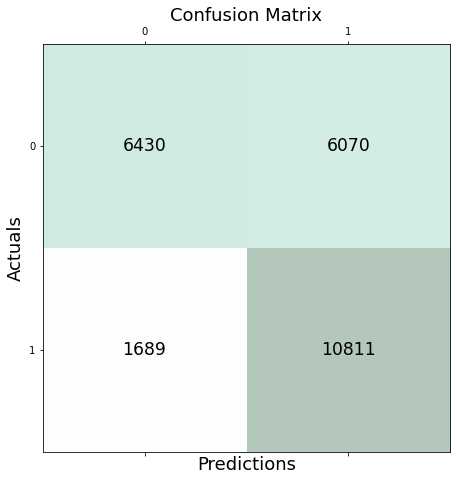

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_3)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.BuGn, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_pred_3))
print(recall_score(y_train, y_pred_3))

0.6404241454890113
0.86488


In [34]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_3, average='macro'))
print(f1_score(y_test, y_pred_3, average='micro'))
print(f1_score(y_test, y_pred_3, average='weighted'))
print(f1_score(y_test, y_pred_3))

0.6798071802553554
0.68964
0.6798071802553554
0.7359177699874068


In [35]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62     12500
           1       0.64      0.86      0.74     12500

    accuracy                           0.69     25000
   macro avg       0.72      0.69      0.68     25000
weighted avg       0.72      0.69      0.68     25000



## Đánh giá mô hình sau khi huấn luyện

### Các phương pháp đánh giá mô hình dự đoán

### ***Accuracy***
### Accuracy (độ chính xác) chỉ đơn giản đánh giá mô hình thường xuyên dự đoán đúng đến mức nào. Độ chính xác là tỉ lệ giữa số điểm dữ liệu được dự đoán đúng và tổng số điểm dữ liệu.
![alt text](./images/accuracy_formula.png "Title")
### <font color="red">Tuy nhiên, một mô hình có độ chính xác cao chưa hẳn đã tốt. Accuracy lộ rõ hạn chế khi được sử dụng trên bộ dữ liệu không cân bằng (imbalanced dataset).</font>

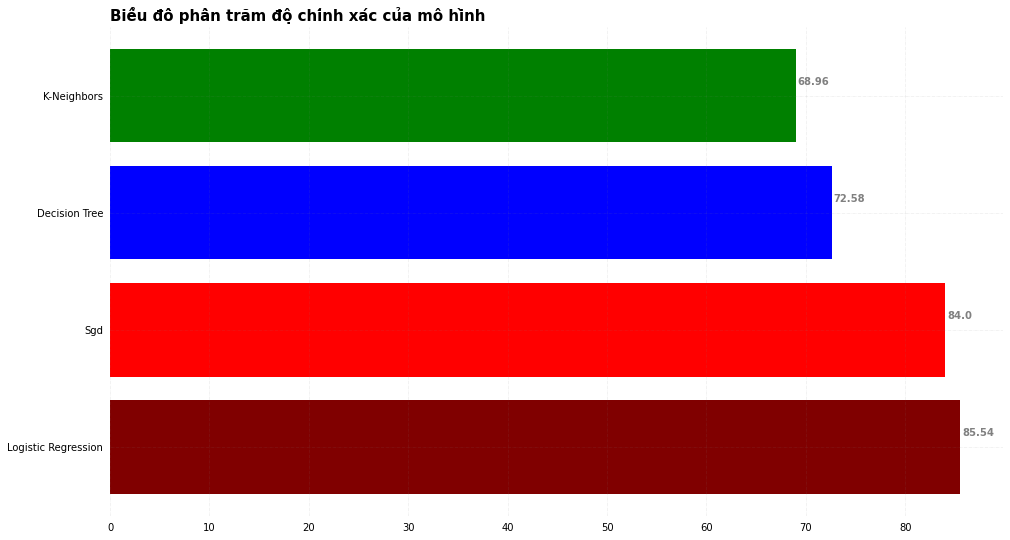

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Logistic Regression", "Sgd", "Decision Tree", "K-Neighbors"])
y = np.array([model_accuracy,model_1_accuracy, model_2_accuracy, model_3_accuracy])
color = np.array(["maroon","red","blue","green"])

fig, ax = plt.subplots(figsize =(16, 9))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_facecolor("white")

plt.barh(x,y, color=color)

# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Biểu đồ phần trăm độ chính xác của mô hình',
             loc ='left',  fontsize = 15,fontweight ='bold')
 
# Add Text watermark

plt.show()

### ***Confusion Matrix***
### Một phương pháp tốt hơn để đánh giá performance của mô hình phân lớp đó là confusion matrix (ma trận nhầm lẫn). Ý tưởng chính là đếm số lần phần tử thuộc class A bị phân loại nhầm vào class B.
### Confusion matrix cung cấp thêm thông tin về tỉ lệ phân lớp đúng giữa các lớp, hay giúp phát hiện các lớp có tỉ lệ phân lớp nhầm cao nhờ vào các khái niệm True (False) Positive (Negative)
![alt text](./images/image-16.png "Title")


### Ma trận nhầm lẫn sẽ cho chúng ta nhiều thông tin về chất lượng của bộ phân lớp.
### True Positive (TP): đối tượng ở lớp Positive, mô hình phân đối tượng vào lớp Positive (dự đoán đúng)
### True Negative (TN): đối tượng ở lớp Negative, mô hình phân đối tượng vào lớp Negative (dự đoán đúng)
### False Positive (FP): đối tượng ở lớp Negative, mô hình phân đối tượng vào lớp Positive (dự đoán sai) – Type I Error
### False Negative (FN): đối tượng ở lớp Positive, mô hình phân đối tượng vào lớp Negative (dự đoán sai) – Type II Error

Text(0.5, 1.0, 'K-Neighbors')

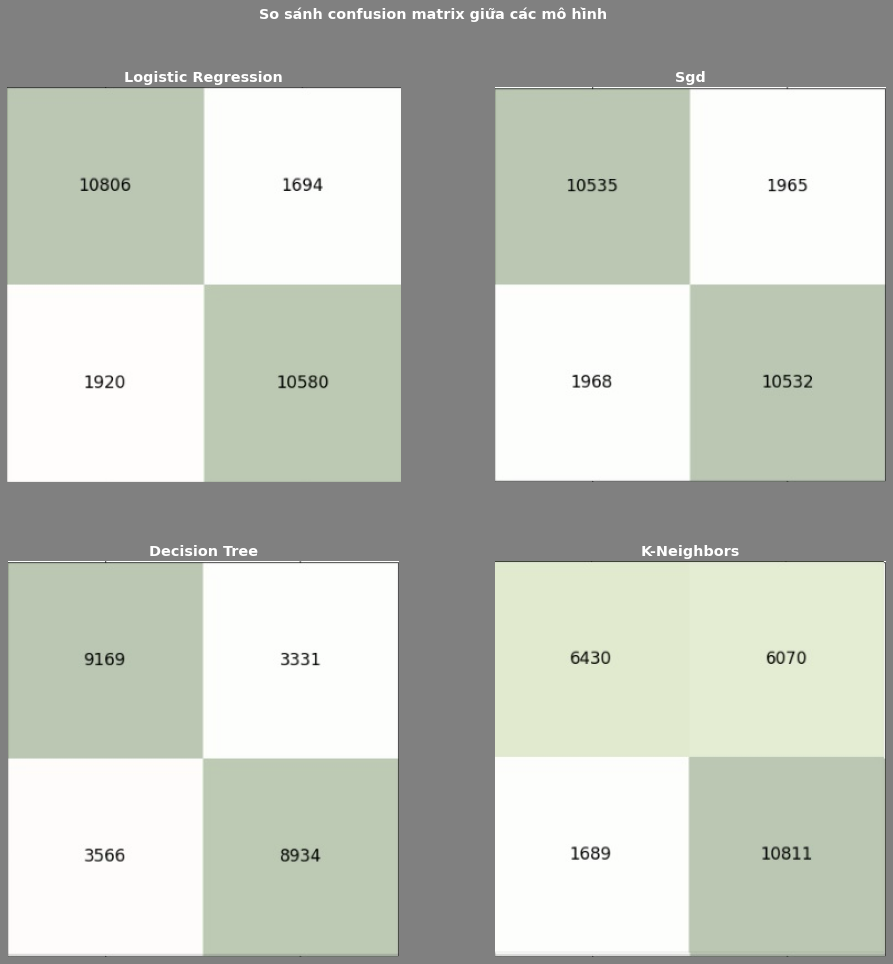

In [37]:
import cv2
fig = plt.figure(figsize=(16, 16))
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = cv2.imread('images/LogisticRegression.jpg')
Image2 = cv2.imread('images/SGDClassifier.jpg')
Image3 = cv2.imread('images/DecisionTreeClassifier.jpg')
Image4 = cv2.imread('images/KNeighborsClassifier.jpg')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

fig.patch.set_facecolor('gray')

st = fig.suptitle("So sánh confusion matrix giữa các mô hình",color="white", fontsize="x-large",fontweight="bold")
st.set_y(0.95)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Logistic Regression",color="white", fontsize="x-large",fontweight="bold")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Sgd",color="white", fontsize="x-large",fontweight="bold")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Decision Tree",color="white", fontsize="x-large",fontweight="bold")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("K-Neighbors",color="white", fontsize="x-large",fontweight="bold")


### Ví dụ đối với mô hình Logistic Regression, chúng ta có thể biểu diễn kết quả dự đoán của mô hình bằng confusion matrix như sau:

### True Positive TP = 10806: 10806 bình luận tốt (positive) được mô hình phân loại đúng.
### False Positive FP = 1694: có 1694 bình luận xấu, nhưng được mô hình phân loại là bình luận tốt.
### True Negative TN = 10580: 10580 bình luận xấu (negative) được mô hình phân loại đúng.
### False Negative FN = 1920: có 1920 bình luận tốt nhưng được mô hình phân loại là bình luận xấu.

### ***Precision và Recall***


### Với những thông tin có được từ Confusion matrix, chúng ta có thể định lượng độ hiệu quả của mô hình qua nhiều thang đo khác nhau. Precision và Recall là hai thang đo quan trọng trong số đó.
### Precision: Trong tất cả các dự đoán Positive được đưa ra, bao nhiêu dự đoán là chính xác? Chỉ số này được tính theo công thức

### <font color="yellow">**Precision = TP / (TP + FP)**</font>

### Recall: Trong tất cả các trường hợp Positive, bao nhiêu trường hợp đã được dự đoán chính xác? Chỉ số này được tính theo công thức:

### <font color="yellow">**Recall = TP / (TP + FN)**</font>

### Precision và Recall có giá trị trong [0,1], hai giá trị này càng gần với 1 thì mô hình càng chính xác. 
### Precision càng cao đồng nghĩa với các điểm được phân loại càng chính xác. 
### Recall càng cao cho thể hiện cho việc ít bỏ sót các điểm dữ liệu đúng.

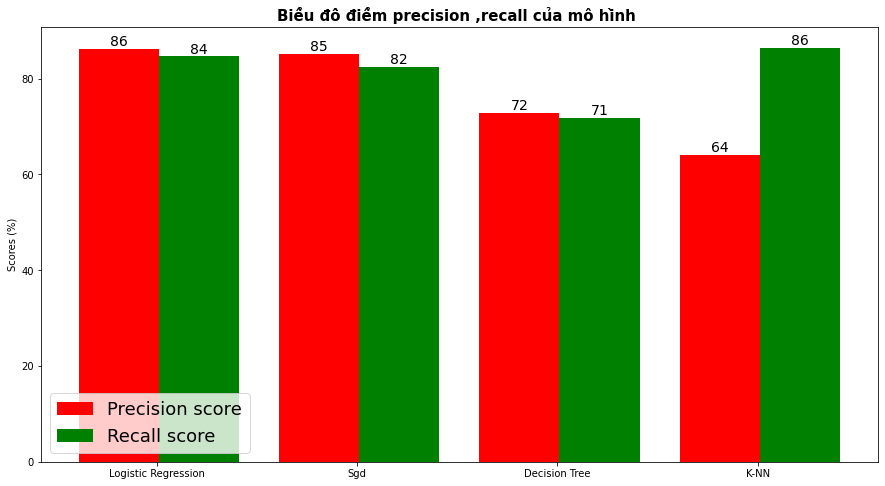

In [38]:

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.4     # the width of the bars

fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor("white")

precision = [precision_score(y_train, y_pred)*100, precision_score(y_train, y_pred_1)*100, precision_score(y_train, y_pred_2)*100, precision_score(y_train, y_pred_3)*100]
rects1 = ax.bar(ind, precision, width, color='r')

recall = [recall_score(y_train, y_pred)*100, recall_score(y_train, y_pred_1)*100, recall_score(y_train, y_pred_2)*100, recall_score(y_train, y_pred_3)*100]
rects2 = ax.bar(ind+width, recall, width, color='g')


ax.set_ylabel('Scores (%)')
ax.set_xticks(ind+width-0.21)
ax.set_xticklabels( ('Logistic Regression','Sgd','Decision Tree','K-NN') )
ax.legend((rects1[0], rects2[0]), ('Precision score', 'Recall score'),loc='lower left', facecolor = "white",fontsize="18")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                ha='center', va='bottom',fontsize="14")

autolabel(rects1)
autolabel(rects2)

ax.set_title('Biểu đồ điểm precision ,recall của mô hình ',
             loc ='center',  fontsize = 15,fontweight ='bold')
             
plt.show()

### ***F1-Score***
### Một mô hình tốt khi cả Precision và Recall đều cao, thể hiện cho mô hình ít phân loại nhầm giữa các lớp cũng như tỉ lệ bỏ sót các đối tượng thuộc lớp cần quan tâm là thấp. Tuy nhiên, hai giá trị Precision và Recall thường không cân bằng với nhau (giá trị này tăng thì giá trị kia thường có xu hướng giảm). Để đánh giá cùng lúc cả Precision và Recall, ta sử dụng độ đo F-Score
![alt text](./images/fscore_formula.jpg "Title")

### Tham số β quyết định mức độ coi trọng giữa Precision và Recall

###  β > 1: Recall được coi trọng hơn Precision
###  β < 1: Precision được coi trọng hơn Recall
###  β = 1: Precision và Recall được coi trọng ngang nhau

### Việc quyết định nên ưu tiên Precision hay Recall phụ thuộc vào từng bài toán 1 vài trường hợp ta chỉ quan tâm đến precision, 1 vài trường hợp ta quan tâm đến recall. Ví dụ, nếu bạn huấn luyện 1 mô hình để phát hiện video an toàn cho trẻ em, bạn phải sử dụng bộ phân lớp mà có thể bỏ sót nhiều video an toàn (recall thấp) nhưng ít bỏ qua các video không an toàn (high precision). Hay còn gọi là giết nhầm còn hơn bỏ sót, thà không hiển thị video an toàn còn hơn là hiển thị video không an toàn.

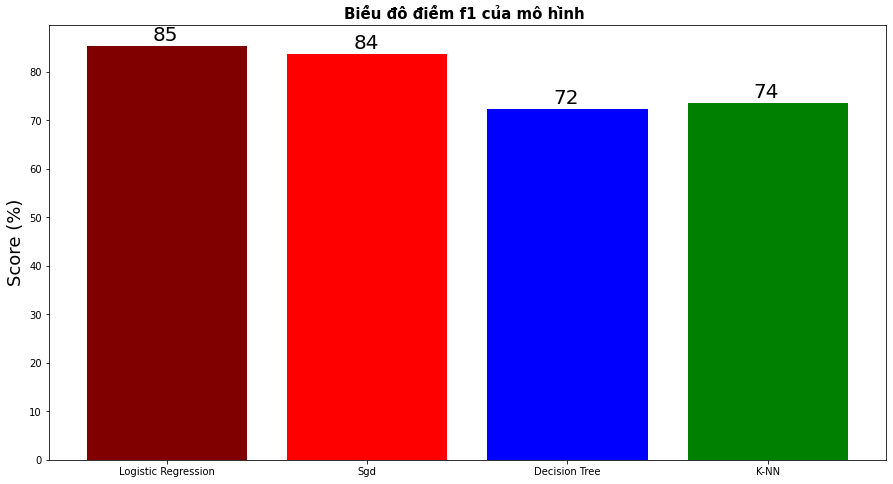

In [39]:
import pandas as pd

x = ['Logistic Regression', 'Sgd', 'Decision Tree', 'K-NN']
y = [f1_score(y_test, y_pred)*100, f1_score(y_test, y_pred_1)*100, f1_score(y_test, y_pred_2)*100,f1_score(y_test, y_pred_3)*100]
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.set_facecolor("white") 



color = np.array(["maroon","red","blue","green"])

plt.bar(x, y, color = color)
 
plt.ylabel('Score (%)', fontsize = 18)
 
for index,data in enumerate(y):
    plt.text(x=index-0.07 , y =data+1 , s=f"{round(data)}" , fontdict=dict(fontsize=20))

ax.set_title('Biểu đồ điểm f1 của mô hình ',
             loc ='center',  fontsize = 15,fontweight ='bold')
plt.show()

### ***ROC curve***

### là một đường cong biểu diễn hiệu suất phân loại của một mô hình phân loại tại các ngưỡng threshold.Về cơ bản, nó hiển thị True Positive Rate (TPR) so với False Positive Rate (FPR) đối với các giá trị ngưỡng khác nhau. Các giá trị TPR, FPR được tính như sau:
![alt text](./images/ROC.png "Title")


### Có rất nhiều mô hình phân loại mang tính xác suất, ví dụ dự doán xác suất của một mẫu là Cat. Chúng so sánh xác suất đầu ra với một số ngưỡng giới hạn và nếu nó lớn hơn ngưỡng đó, mô hình dự đoán nhãn là Cat, còn không thì là Non-cat.

### Ví dụ mô hình của bạn dự đoán giá trị xác suất cho 4 samples lần lượt là [0.45, 0.6, 0.7, 0.3]. Tùy vào giá trị ngưỡng mà sẽ có các nhãn đầu ra dự đoán khác nhau:

### Ngưỡng là 0.5: Sample 2,3 là Cat
### Ngưỡng là 0.25: Tất cả samples đều là Cat
### Ngưỡng là 0.8: Tất cả sample là Non-cat
### Có thể thấy với các ngưỡng khác nhau, chúng ta sẽ có kết quả dự đoán nhãn khác nhau, kéo theo các giá trị như precision hay recall cũng sẽ khác nhau

### ROC tìm ra TPR và FPR ứng với các giá tị ngưỡng khác nhau và vẽ biểu đồ để dễ dàng quan sát TPR so với FPR.

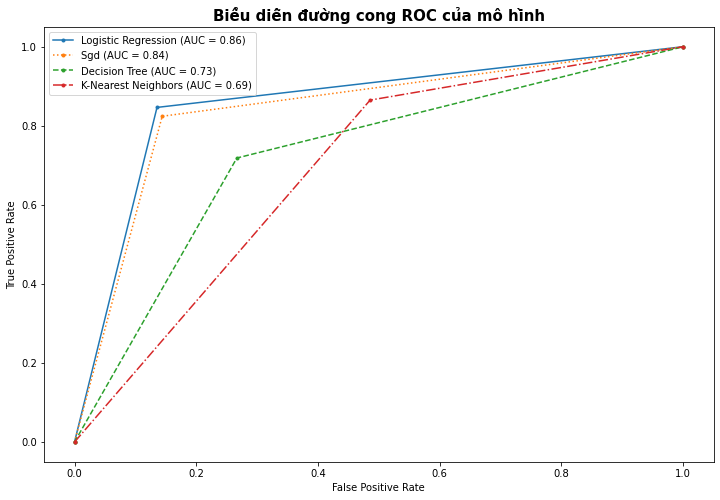

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, y_pred)
Sgd_auc = roc_auc_score(y_test, y_pred_1)
dct_auc = roc_auc_score(y_test, y_pred_2)
knn_auc = roc_auc_score(y_test, y_pred_3)


label1 = "Logistic Regression" + " (AUC = " + str(round(lr_auc,2)) +")"
label2 = "Sgd" + " (AUC = " + str(round(Sgd_auc,2))+")"
label3 = "Decision Tree" + " (AUC = " +str(round(dct_auc,2))+")"
label4 = "K-Nearest Neighbors" +" (AUC = " + str(round(knn_auc,2))+")"
# summarize scores

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
Sgd_fpr, Sgd_tpr, _ = roc_curve(y_test, y_pred_1)
dct_fpr, dct_tpr, _ = roc_curve(y_test, y_pred_2)
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_3)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(lr_fpr, lr_tpr,marker='.', linestyle='solid', label=label1)
plt.plot(Sgd_fpr, Sgd_tpr,marker='.', linestyle='dotted', label=label2)
plt.plot(dct_fpr, dct_tpr,marker='.', linestyle='dashed', label=label3)
plt.plot(knn_fpr, knn_tpr, marker='.',linestyle='dashdot', label=label4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ax.set_title('Biểu diễn đường cong ROC của mô hình',
             loc ='center',  fontsize = 15,fontweight ='bold')
# show the legend
plt.legend()
# show the plot
plt.show()

### ***AUC*** là phần diện tích bên dưới ROC curve, dùng để đánh giá hiệu năng phân loại của các mô hình với nhau. Mô hình có AUC càng lớn (ROC curve càng gần góc cao bên trái) thì cho kết quả càng chính xác. Ngược lại, mô hình có ROC curve càng tiến tới đường chéo 45 độ (đường gạch đứt màu xanh ở hình trên), tức AUC càng thấp thì kết quả càng tệ. AUC càng cao thì mô hình càng dễ phân loại đúng cho cả lớp positive và negative.
![alt text](./images/roc3.png "Title")


## <font color="yellow"> => Sau lần lượt các đánh giá ta chọn mô hình ***Logistic Regression*** là mô hình tốt nhất trong 4 mô hình huấn luyện cho bài toán phân tích cảm nhận của người xem phim (Sentiment Analysis of Movie Reviews) </font>

### Xuất ra mô hình với thư viện joblib và kiểm thử với bộ dữ liệu IMDB Dataset of 50K Movie Reviews

In [41]:
import joblib

filename = "Completed_model.joblib"
joblib.dump(model, filename)


['Completed_model.joblib']

In [42]:
filename = "Completed_model.joblib"
model = joblib.load(filename)

In [1]:
import pandas as pd
import re
df = pd.read_csv('./IMDB Dataset.csv')


test = df['review'][20:25]

In [2]:
for i in test:
    print(i)

After the success of Die Hard and it's sequels it's no surprise really that in the 1990s, a glut of 'Die Hard on a .....' movies cashed in on the wrong guy, wrong place, wrong time concept. That is what they did with Cliffhanger, Die Hard on a mountain just in time to rescue Sly 'Stop or My Mom Will Shoot' Stallone's career.<br /><br />Cliffhanger is one big nit-pickers dream, especially to those who are expert at mountain climbing, base-jumping, aviation, facial expressions, acting skills. All in all it's full of excuses to dismiss the film as one overblown pile of junk. Stallone even managed to get out-acted by a horse! However, if you an forget all the nonsense, it's actually a very lovable and undeniably entertaining romp that delivers as plenty of thrills, and unintentionally, plenty of laughs.<br /><br />You've got to love John Lithgows sneery evilness, his tick every box band of baddies, and best of all, the permanently harassed and hapless 'turncoat' agent, Rex Linn as Travers.

In [ ]:
test = [clean(doc) for doc in test]
test = [is_special(doc) for doc in test]
test = [to_lower(doc) for doc in test]

print(test)


In [46]:
len(test)

5

In [47]:
user_test = vect.transform(test)
y_pred_user = model.predict(user_test)
true_label = df['sentiment'][20:25]


for i in range(0,5):
    print(test[i])
    print("Predicted Label:",check[y_pred_user[i]])
    print("Ground Label: ",true_label[20+i])



after the success of die hard and it s sequels it s no surprise really that in the 1990s  a glut of  die hard on a        movies cashed in on the wrong guy  wrong place  wrong time concept  that is what they did with cliffhanger  die hard on a mountain just in time to rescue sly  stop or my mom will shoot  stallone s career cliffhanger is one big nit pickers dream  especially to those who are expert at mountain climbing  base jumping  aviation  facial expressions  acting skills  all in all it s full of excuses to dismiss the film as one overblown pile of junk  stallone even managed to get out acted by a horse  however  if you an forget all the nonsense  it s actually a very lovable and undeniably entertaining romp that delivers as plenty of thrills  and unintentionally  plenty of laughs you ve got to love john lithgows sneery evilness  his tick every box band of baddies  and best of all  the permanently harassed and hapless  turncoat  agent  rex linn as travers he may of been henry in 

In [49]:
import pickle
filename = "finalized_model.pkl"
with open(filename, 'wb') as fout:
    pickle.dump((vect, model), fout)

    